In [1]:
import pandas as pd 
import numpy as np
#import math

In [142]:
X_train = pd.read_csv('X_train.csv')
X_valid = pd.read_csv('X_valid.csv')
y_train = pd.read_csv('y_train.csv')
y_valid = pd.read_csv('y_valid.csv')

In [143]:
#concatenate training + validation sets 
X = pd.concat([X_train, X_valid])
y = pd.concat([y_train, y_valid])

In [144]:
X = X.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
y = y.drop('Unnamed: 0', axis = 1)

In [145]:
X.head()

,item_type,utc_date,country_code,item_price,currency,numTracks,dateModified,datePublished,albumRelease,Genre,inAlbum,tags
0,a,1.599956e+09,au,2.184,AUD,6.0,1.305590e+09,1.305518e+09,1,rock,is,other
1,t,1.600334e+09,nz,1.300,GBP,1.0,1.574759e+09,1.574760e+09,1,electronic,in,house
2,a,1.600598e+09,de,0.000,USD,3.0,1.376506e+09,1.359491e+09,1,electronic,is,80s
3,a,1.601296e+09,nz,0.000,USD,25.0,1.606288e+09,1.567251e+09,1,experimental,is,disco
4,a,1.601310e+09,fr,0.000,USD,6.0,1.586739e+09,1.413672e+09,1,metal,is,other


In [146]:
import datetime

In [147]:
utc_datetime = [datetime.datetime.utcfromtimestamp(x) for x in X['utc_date']]
day_month_year = [y.strftime("%a/%d") for y in utc_datetime]

In [148]:
#Bandcamp friday: first friday of the week
fridays = ['Fri/01', 'Fri/02', 'Fri/03', 'Fri/04', 'Fri/05', 'Fri/06', 'Fri/07']

In [149]:
BC_fridays = [1 if day in fridays else 0 for day in day_month_year]

In [150]:
X['BC_fridays'] = BC_fridays
X = X.drop(['utc_date', 'dateModified', 'datePublished'], axis = 1)

In [151]:
X.columns

Index(['item_type', 'country_code', 'item_price', 'currency', 'numTracks',
       'albumRelease', 'Genre', 'inAlbum', 'tags', 'BC_fridays'],
      dtype='object')

In [152]:
num_cols = ['item_price', 'numTracks', 'albumRelease']

In [153]:
for c in num_cols:
    X[c] = (X[c] - np.mean(X[c])) / np.std(X[c]) 

In [154]:
X.head()

,item_type,country_code,item_price,currency,numTracks,albumRelease,Genre,inAlbum,tags,BC_fridays
0,a,au,-0.486443,AUD,-0.029680,-0.37912,rock,is,other,0
1,t,nz,-0.725651,GBP,-0.515869,-0.37912,electronic,in,house,0
2,a,de,-1.077429,USD,-0.321394,-0.37912,electronic,is,80s,0
3,a,nz,-1.077429,USD,1.817836,-0.37912,experimental,is,disco,0
4,a,fr,-1.077429,USD,-0.029680,-0.37912,metal,is,other,0


In [155]:
y = y['amount_paid_usd']
y = (y - np.mean(y))/ np.std(y)

In [156]:
X_test = pd.read_csv('X_test.csv')
X_test = X_test.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
X_test.head()

,item_type,utc_date,country_code,item_price,currency,numTracks,dateModified,datePublished,albumRelease,Genre,inAlbum,tags
0,a,1.601324e+09,us,10.0000,USD,11.0,1.592490e+09,1.586443e+09,4,folk,is,indie
1,t,1.601040e+09,gb,1.0800,CHF,1.0,1.601020e+09,1.600984e+09,1,electronic,not,berlin
2,a,1.600863e+09,ru,2.0000,USD,10.0,1.599186e+09,1.583545e+09,1,ambient,is,other
3,a,1.601557e+09,gb,8.2075,EUR,11.0,1.606497e+09,1.536095e+09,1,electronic,is,electro
4,t,1.601513e+09,au,1.0900,CHF,1.0,1.580825e+09,1.580579e+09,1,electronic,in,other


In [157]:
y_test = pd.read_csv('y_test.csv')
y_test = y_test.drop('Unnamed: 0', axis = 1)

In [158]:
utc_datetime = [datetime.datetime.utcfromtimestamp(x) for x in X_test['utc_date']]
day_month_year = [y.strftime("%a/%d") for y in utc_datetime]

In [159]:
BC_fridays = [1 if day in fridays else 0 for day in day_month_year]

In [160]:
X_test['BC_fridays'] = BC_fridays
X_test = X_test.drop(['utc_date', 'dateModified', 'datePublished'], axis = 1)

In [161]:
X.shape, X_test.shape

((483876, 10), (120970, 10))

In [162]:
X_dummies = pd.concat([X, X_test])
X_dummies = pd.get_dummies(X_dummies)

X_test = X_dummies[483876:]
X_d = X_dummies[:483876]
X_test.shape, X_d.shape

((120970, 261), (483876, 261))

In [163]:
y_test = y_test['amount_paid_usd']
y_test = (y_test - np.mean(y_test))/np.std(y_test)

In [164]:
y_test.shape, y.shape, X_test.shape, X_d.shape

((120970,), (483876,), (120970, 261), (483876, 261))

#### random forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rfr = RandomForestRegressor(random_state = 42, n_estimators = 100, min_samples_split = 10, max_features = 0.5)

In [50]:
rfr.fit(X_d, y)

RandomForestRegressor(max_features=0.5, min_samples_split=10, random_state=42)

In [51]:
pred = rfr.predict(X_test)

In [43]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [56]:
RMSE = sqrt(mean_squared_error(y_test, pred))

In [57]:
RMSE

1.979522144942595

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
error_df = pd.DataFrame()

In [80]:
error_df['true'] = y_test
error_df['pred'] = pred
error_df['error'] = y_test - pred

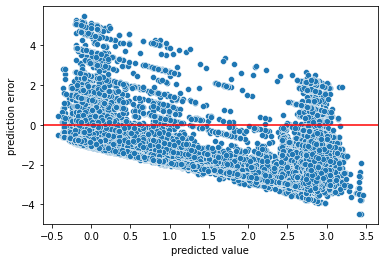

In [89]:
sns.scatterplot(data = error_df, x = 'pred', y = 'error')
plt.axhline(y = 0, color = 'r')
plt.xlabel('predicted value')
plt.ylabel('prediction error')
plt.savefig('error_plot_rf.png', bbox_inches='tight', dpi=200)

In [64]:
y_test

0         1.236321
1        -0.932073
2        -0.708427
3         1.085603
4        -0.929642
            ...   
120965    1.897536
120966    0.020853
120967   -0.881023
120968    0.020853
120969   -0.951521
Name: amount_paid_usd, Length: 120970, dtype: float64

In [65]:
len(pred)

120970

In [ ]:
#retrain network with entity embeddings 

In [165]:
X_test = X_test[['item_price', 'numTracks', 'albumRelease', 'BC_fridays', 'item_type_a', 'item_type_t', 'inAlbum_in', 'inAlbum_is', 'inAlbum_not']]


In [166]:
X_d = X_d[['item_price', 'numTracks', 'albumRelease', 'BC_fridays', 'item_type_a', 'item_type_t', 'inAlbum_in', 'inAlbum_is', 'inAlbum_not']]

In [167]:
X_test.shape, X_d.shape

((120970, 9), (483876, 9))

In [168]:
X_train = X_d.copy()
X_test = X_test.copy()

In [169]:
num_cols = ['item_price', 'numTracks', 'albumRelease']

for c in num_cols:
    X_test[c] = (X_test[c] - np.mean(X_test[c])) / np.std(X_test[c])
    X_train[c] = (X_train[c] - np.mean(X_train[c])) / np.std(X_train[c]) 

In [170]:
X_train.head()

,item_price,numTracks,albumRelease,BC_fridays,item_type_a,item_type_t,inAlbum_in,inAlbum_is,inAlbum_not
0,-0.486443,-0.029680,-0.37912,0,1,0,0,1,0
1,-0.725651,-0.515869,-0.37912,0,0,1,1,0,0
2,-1.077429,-0.321394,-0.37912,0,1,0,0,1,0
3,-1.077429,1.817836,-0.37912,0,1,0,0,1,0
4,-1.077429,-0.029680,-0.37912,0,1,0,0,1,0


In [171]:
X_test.head()

,item_price,numTracks,albumRelease,BC_fridays,item_type_a,item_type_t,inAlbum_in,inAlbum_is,inAlbum_not
0,1.629203,0.436658,2.242001,0,1,0,0,1,0
1,-0.785942,-0.497934,-0.377800,0,0,1,0,0,1
2,-0.536847,0.343198,-0.377800,0,1,0,0,1,0
3,1.143872,0.436658,-0.377800,0,1,0,0,1,0
4,-0.783235,-0.497934,-0.377800,0,0,1,1,0,0


In [173]:
y_train = y_train['amount_paid_usd']
y_train = (y_train - np.mean(y_train))/ np.std(y_train)

In [174]:
y_train.shape

(362907,)

In [177]:
y_test

0         1.236321
1        -0.932073
2        -0.708427
3         1.085603
4        -0.929642
            ...   
120965    1.897536
120966    0.020853
120967   -0.881023
120968    0.020853
120969   -0.951521
Name: amount_paid_usd, Length: 120970, dtype: float64

In [181]:
get_all_codes = pd.concat([X,X_test])

In [185]:
Xt = pd.read_csv('X_test.csv')

In [188]:
Xt = Xt.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)